The original work is [M5 - Witch Time](https://www.kaggle.com/kyakovlev/m5-witch-time).

Thank you, Konstantin-san. :-)

This is a template for doing "Witch Time" by store.
see [charts by stores](https://www.kaggle.com/marutama/charts-by-stores)

これはsutoreごとにWitch Timeするためのテンプレートです。
このチャートも見てください。 [charts by stores](https://www.kaggle.com/marutama/charts-by-stores)

# Charts by store

In [23]:
import os
import numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from itertools import cycle
import statsmodels.api as sm 
from scipy.interpolate import interp1d
import datetime as dt

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [24]:
osj = os.path.join
INPUT_DIR = ''
train = pd.read_csv(osj(INPUT_DIR, 'sales_train_evaluation.csv'))
price = pd.read_csv(osj(INPUT_DIR, 'sell_prices.csv'))
calender = pd.read_csv(osj(INPUT_DIR, 'calendar.csv'))

sample_submit = pd.read_csv(osj(INPUT_DIR, 'sample_submission.csv'))

In [25]:
calender['date'] = pd.to_datetime(calender['date'])

In [26]:
d_cols = [c for c in train.columns if 'd_' in c] # d_で始まる日付列のリスト

In [27]:
past_sales = train.set_index('id')[d_cols].T.merge(calender.set_index('d')['date'],
                                                   left_index=True,
                                                   right_index=True,
                                                   validate='1:1').set_index('date')

In [28]:
def make_total_sales_lowess( p ):
    total_sales = pd.DataFrame(p.sum(axis=1), columns=['total sales'])
    
    # クリスマス削除
    total_sales_noXmas = total_sales.drop(index=[dt.datetime(2011,12,25), 
                                                 dt.datetime(2012,12,25), 
                                                 dt.datetime(2013,12,25), 
                                                 dt.datetime(2014,12,25), 
                                                 dt.datetime(2015,12,25)])

    df = total_sales_noXmas
    lowess = sm.nonparametric.lowess(df['total sales'], df.index, frac=.3) 
    lowess_x = list(zip(*lowess))[0] 
    lowess_y = list(zip(*lowess))[1] 
    
    f = interp1d(lowess_x, lowess_y, bounds_error=False)
    new_lowess_x = df.index
    new_lowess_y = f(new_lowess_x)
    
    total_sales_lowess = total_sales_noXmas
    total_sales_lowess['lowess'] = new_lowess_y
    total_sales_lowess['total sales-lowess'] = total_sales_lowess['total sales'] - total_sales_lowess['lowess']
    
    return total_sales_lowess

In [29]:
total_sales_lowess = make_total_sales_lowess( past_sales )

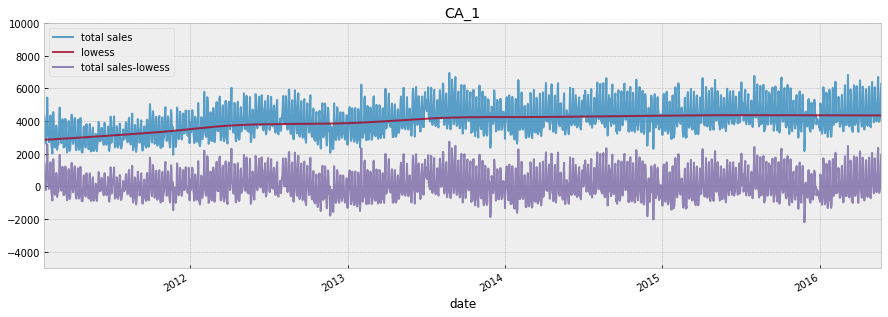

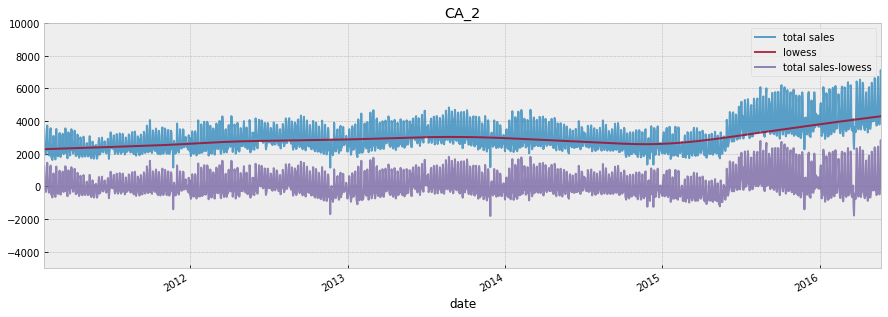

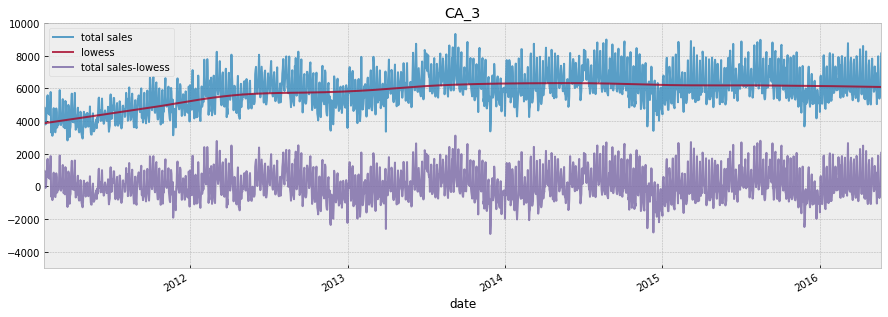

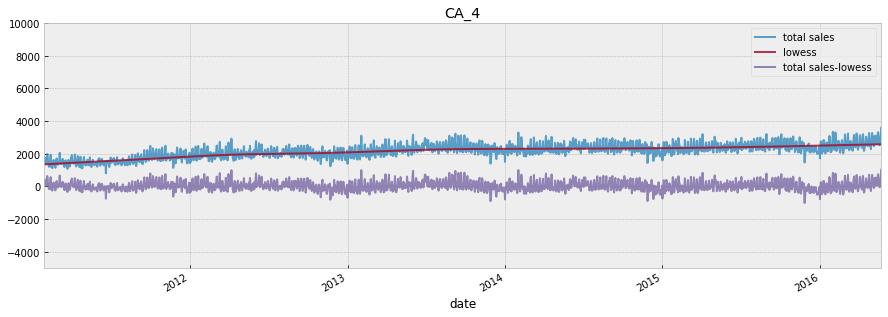

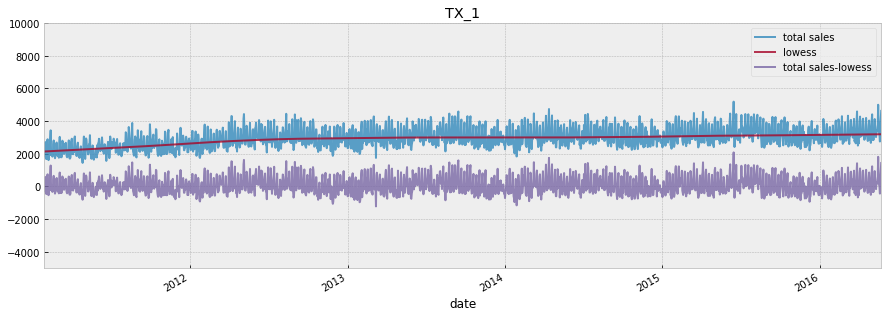

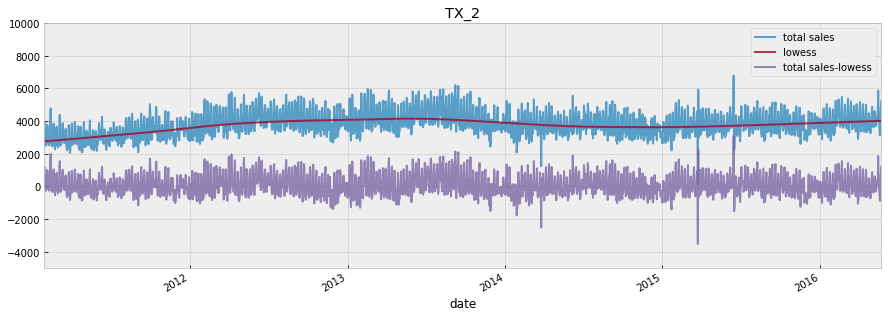

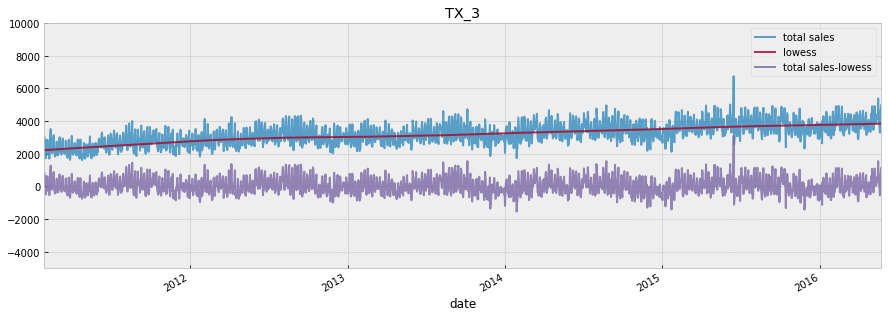

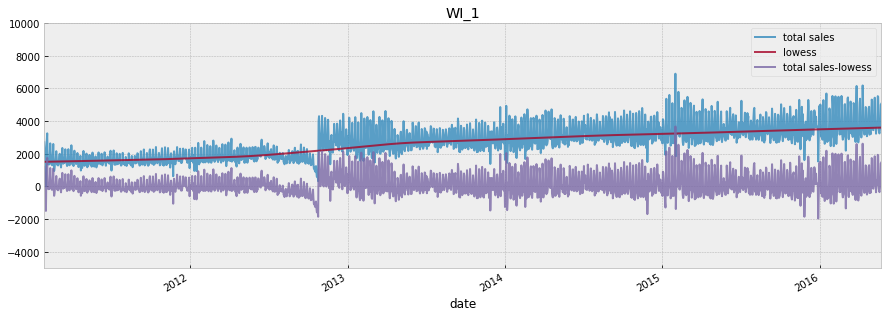

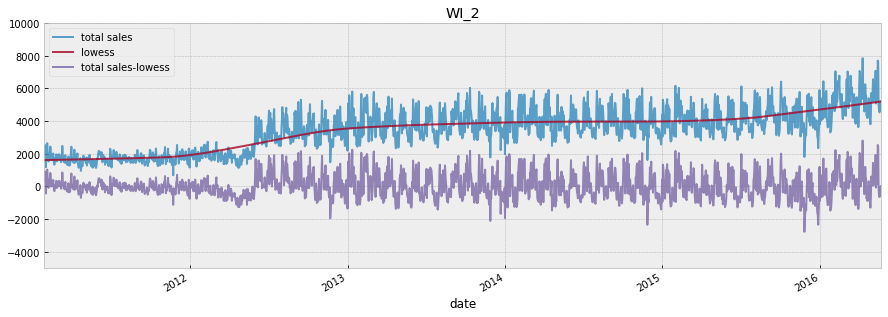

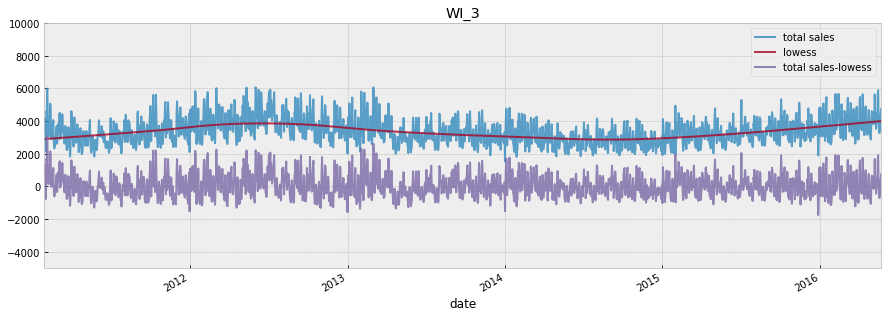

In [30]:
y_bt = -5000
y_up = 10000
store_list = price['store_id'].unique()
for store in store_list :
    total_sales_lowess_tmp = make_total_sales_lowess( past_sales.loc[:, past_sales.columns.str.contains(store)] )
    total_sales_lowess_tmp.plot(figsize=(15, 5), alpha=0.8, ylim=[y_bt, y_up],title=store)

# Charts trends

We can found following chart trends in recently:

CA_1 : small -

CA_2 : +

CA_3 : small -

CA_4 : small +

TX_1 : stable

TX_2 : small +

TX_3 : small +

WI_1 : +

WI_2 : ++

WI_3 : +

Let's adjust!

# Adjust submission

In [31]:
########################### Read base submission
############################################################################
submission = pd.read_csv('all_preds.csv')
submission.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,0.862814,0.755392,0.737257,0.745418,0.934775,1.140093,1.030378,0.975882,0.839051,0.916886,0.750821,1.032412,1.143030,1.083038,0.890270,0.806953,0.883848,0.849033,0.905020,1.172682,1.024101,0.871879,0.795950,0.825587,0.898846,1.019817,1.246788,1.029537
1,HOBBIES_1_002_CA_1_evaluation,0.206387,0.174187,0.174005,0.175979,0.211783,0.261892,0.292831,0.218940,0.195685,0.231386,0.205423,0.284628,0.340875,0.309599,0.212682,0.257099,0.202533,0.208333,0.261144,0.293818,0.346091,0.238721,0.212151,0.223520,0.247426,0.284885,0.325253,0.376737
2,HOBBIES_1_003_CA_1_evaluation,0.480089,0.407562,0.438265,0.496312,0.636969,0.744077,0.764800,0.493818,0.460572,0.491114,0.454549,0.675522,0.791647,0.656545,0.468189,0.519165,0.446168,0.458719,0.616239,0.739460,0.677036,0.487931,0.417392,0.456063,0.469323,0.608748,0.702257,0.641541
3,HOBBIES_1_004_CA_1_evaluation,1.611069,1.269806,1.296877,1.371200,1.807072,2.626802,3.099593,1.962410,1.431473,1.352747,1.416136,2.245924,2.893117,3.015168,1.680150,1.504242,1.320549,1.409574,1.856423,2.425937,2.910130,1.627619,1.370782,1.353219,1.376952,1.920274,2.540613,2.592497
4,HOBBIES_1_005_CA_1_evaluation,1.039274,0.928064,0.848386,0.990334,1.097651,1.350121,1.461086,1.220850,0.995281,1.108728,0.930426,1.396181,1.516822,1.557301,1.056394,1.014403,1.005940,1.037940,1.173720,1.439810,1.436118,1.108109,1.061180,0.982638,1.086733,1.306806,1.676250,1.306714


In [32]:
submission.tail()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
30485,FOODS_3_823_WI_3_evaluation,0.490945,0.439336,0.458195,0.485385,0.522387,0.491644,0.623613,0.511215,0.476988,0.477395,0.660992,0.710224,0.688649,0.781084,0.678167,0.516857,0.563905,0.608451,0.579666,0.720541,0.880270,0.595594,0.587051,0.605111,0.445186,0.497185,0.571706,0.658475
30486,FOODS_3_824_WI_3_evaluation,0.236317,0.236471,0.204553,0.194559,0.199426,0.257698,0.264564,0.259282,0.222246,0.264666,0.402945,0.383764,0.359597,0.474539,0.376973,0.311948,0.356338,0.317673,0.242100,0.354802,0.421562,0.269584,0.356640,0.336438,0.258010,0.233215,0.291633,0.317486
30487,FOODS_3_825_WI_3_evaluation,0.610224,0.493961,0.459581,0.463461,0.497673,0.599234,0.691963,0.710114,0.488546,0.695608,1.211727,1.237048,0.906639,1.461241,1.236056,0.856579,1.093301,1.111491,0.829361,1.187166,1.326981,1.036189,1.148172,1.121819,0.765915,0.729844,0.776463,0.992858
30488,FOODS_3_826_WI_3_evaluation,0.972641,0.976643,0.970062,0.916871,0.975167,1.168937,1.014707,1.230340,1.007646,0.871880,1.212802,1.308766,1.190966,1.478212,1.168559,1.064394,1.073312,1.114648,1.024503,1.333011,1.353100,1.134052,1.339845,1.234487,1.032388,1.082218,1.237254,1.232244
30489,FOODS_3_827_WI_3_evaluation,1.640864,1.553843,1.441585,1.603823,1.774664,1.840331,1.695502,1.794754,1.439721,1.236479,1.677978,1.963636,1.897886,1.871363,1.516397,1.463242,1.355108,1.469038,1.561847,2.067353,1.967981,1.751973,1.885415,1.553803,1.421492,1.745921,1.814694,1.923509


In [33]:
########################### Day 1
############################################################################

# Current number of teams       3,215 (day 2 of May)
# Number of teams 2 days before 3,186 
teams_now = 3215
teams_before = 3186
#submission['F1'] *= teams_now/teams_before
submission.loc[submission['id'].str.contains('CA_1'), 'F1'] *= 1.009
submission.loc[submission['id'].str.contains('CA_2'), 'F1'] *= 1.02
submission.loc[submission['id'].str.contains('CA_3'), 'F1'] *= 1.009
submission.loc[submission['id'].str.contains('CA_4'), 'F1'] *= 1.011

submission.loc[submission['id'].str.contains('TX_1'), 'F1'] *= 1.01
submission.loc[submission['id'].str.contains('TX_2'), 'F1'] *= 1.011
submission.loc[submission['id'].str.contains('TX_3'), 'F1'] *= 1.011

submission.loc[submission['id'].str.contains('WI_1'), 'F1'] *= 1.015
submission.loc[submission['id'].str.contains('WI_2'), 'F1'] *= 1.02
submission.loc[submission['id'].str.contains('WI_3'), 'F1'] *= 1.015
submission['F1'].sum()

39737.55112382706

In [34]:
########################### Day 2
############################################################################

# In case you'll get a heart attack 
# because of all the MAGIC in this kernel -
# here is South Korean emergency number - 119
magic = submission['F2'].sum()
japan_emergency = 119
#submission['F2'] *= magic / (magic + japan_emergency)
                             
submission.loc[submission['id'].str.contains('CA_1'), 'F2'] *= 0.994
submission.loc[submission['id'].str.contains('CA_2'), 'F2'] *= 0.998
submission.loc[submission['id'].str.contains('CA_3'), 'F2'] *= 0.994
submission.loc[submission['id'].str.contains('CA_4'), 'F2'] *= 0.996

submission.loc[submission['id'].str.contains('TX_1'), 'F2'] *= 0.995
submission.loc[submission['id'].str.contains('TX_2'), 'F2'] *= 0.996
submission.loc[submission['id'].str.contains('TX_3'), 'F2'] *= 0.996

submission.loc[submission['id'].str.contains('WI_1'), 'F2'] *= 0.998
submission.loc[submission['id'].str.contains('WI_2'), 'F2'] *= 1
submission.loc[submission['id'].str.contains('WI_3'), 'F2'] *= 0.998

submission['F2'].sum()

36451.630296424424

In [35]:
########################### Day 3
############################################################################

# 1913 - The Woman suffrage parade of 1913 takes place in Washington, D.C.
# 1923 - Ankara replaces Istanbul (Constantinople), as the capital of Turkey.
#submission['F3'] *= 1913/1923
submission.loc[submission['id'].str.contains('CA_1'), 'F3'] *= 0.994
submission.loc[submission['id'].str.contains('CA_2'), 'F3'] *= 0.998
submission.loc[submission['id'].str.contains('CA_3'), 'F3'] *= 0.994
submission.loc[submission['id'].str.contains('CA_4'), 'F3'] *= 0.996

submission.loc[submission['id'].str.contains('TX_1'), 'F3'] *= 0.995
submission.loc[submission['id'].str.contains('TX_2'), 'F3'] *= 0.996
submission.loc[submission['id'].str.contains('TX_3'), 'F3'] *= 0.996

submission.loc[submission['id'].str.contains('WI_1'), 'F3'] *= 1
submission.loc[submission['id'].str.contains('WI_2'), 'F3'] *= 1.005
submission.loc[submission['id'].str.contains('WI_3'), 'F3'] *= 1
submission['F3'].sum()

36420.002560045854

In [36]:
########################### Day 4
############################################################################

# I love statistics.
# When you dig in data you can 
# find VERY interesting "facts".
# Did you know that the mean 
# number of sexual partners 
# per person is 1.0073
sex_constant = 1.0073
#submission['F4'] /= sex_constant
submission.loc[submission['id'].str.contains('CA_1'), 'F4'] *= 0.98
submission.loc[submission['id'].str.contains('CA_2'), 'F4'] *= 1.02
submission.loc[submission['id'].str.contains('CA_3'), 'F4'] *= 0.98
submission.loc[submission['id'].str.contains('CA_4'), 'F4'] *= 1

submission.loc[submission['id'].str.contains('TX_1'), 'F4'] *= 0.99
submission.loc[submission['id'].str.contains('TX_2'), 'F4'] *= 1
submission.loc[submission['id'].str.contains('TX_3'), 'F4'] *= 1

submission.loc[submission['id'].str.contains('WI_1'), 'F4'] *= 1.00
submission.loc[submission['id'].str.contains('WI_2'), 'F4'] *= 1.02
submission.loc[submission['id'].str.contains('WI_3'), 'F4'] *= 1.00
submission['F4'].sum()

36580.16621929308

In [37]:
########################### Day 5
############################################################################

# It's Friday  
# Friday night is a mix (colors)
# of girls #ffb0e8 and boys #330000
# Resulted mix HEX color code is #995874
color_of_the_night = 995874

# There are millions "Stories"
# We need to make it Mean, really mean
color_of_the_night /= 1000000
#submission['F5'] *= color_of_the_night
submission.loc[submission['id'].str.contains('CA_1'), 'F5'] *= 0.995
submission.loc[submission['id'].str.contains('CA_2'), 'F5'] *= 1
submission.loc[submission['id'].str.contains('CA_3'), 'F5'] *= 0.995
submission.loc[submission['id'].str.contains('CA_4'), 'F5'] *= 0.998

submission.loc[submission['id'].str.contains('TX_1'), 'F5'] *= 0.996
submission.loc[submission['id'].str.contains('TX_2'), 'F5'] *= 0.998
submission.loc[submission['id'].str.contains('TX_3'), 'F5'] *= 0.998

submission.loc[submission['id'].str.contains('WI_1'), 'F5'] *= 1
submission.loc[submission['id'].str.contains('WI_2'), 'F5'] *= 1.01
submission.loc[submission['id'].str.contains('WI_3'), 'F5'] *= 1
submission['F5'].sum()

41581.3269256988

In [38]:
########################### Day 6
############################################################################

# Fridays not always pass without "consequences"
# BE CAREFUL - DRINK MODERATELY
# https://www.ncbi.nlm.nih.gov/pubmed/25701909
# Traumatic brain injury and cognition.
# PMID: 25701909 DOI: 10.1016/B978-0-444-63521-1.00037-6

# 1.00037-6 - it can't be just a coincidence
injury = 1.000376
#submission['F6'] *= injury
submission.loc[submission['id'].str.contains('CA_1'), 'F6'] *= 1.0002
submission.loc[submission['id'].str.contains('CA_2'), 'F6'] *= 1.001
submission.loc[submission['id'].str.contains('CA_3'), 'F6'] *= 1.0002
submission.loc[submission['id'].str.contains('CA_4'), 'F6'] *= 1.001

submission.loc[submission['id'].str.contains('TX_1'), 'F6'] *= 1.000
submission.loc[submission['id'].str.contains('TX_2'), 'F6'] *= 1.001
submission.loc[submission['id'].str.contains('TX_3'), 'F6'] *= 1.001

submission.loc[submission['id'].str.contains('WI_1'), 'F6'] *= 1.001
submission.loc[submission['id'].str.contains('WI_2'), 'F6'] *= 1.01
submission.loc[submission['id'].str.contains('WI_3'), 'F6'] *= 1.001
submission['F6'].sum()

49497.91311084902

In [39]:
########################### Day 7
############################################################################

# Let's make it aaaall random
# We will need NumPy

# We will divide the COMPLETELY random number
# from range >1000000 by 1000000
# to have some float number from 0 to 1 

import numpy as np
np.random.seed(198505)
correction = np.random.randint(1000000)/1000000
#submission['F7'] *= correction
submission.loc[submission['id'].str.contains('CA_1'), 'F7'] *= 0.994
submission.loc[submission['id'].str.contains('CA_2'), 'F7'] *= 1
submission.loc[submission['id'].str.contains('CA_3'), 'F7'] *= 0.994
submission.loc[submission['id'].str.contains('CA_4'), 'F7'] *= 0.998

submission.loc[submission['id'].str.contains('TX_1'), 'F7'] *= 0.995635
submission.loc[submission['id'].str.contains('TX_2'), 'F7'] *= 0.998
submission.loc[submission['id'].str.contains('TX_3'), 'F7'] *= 0.998

submission.loc[submission['id'].str.contains('WI_1'), 'F7'] *= 1
submission.loc[submission['id'].str.contains('WI_2'), 'F7'] *= 1.01
submission.loc[submission['id'].str.contains('WI_3'), 'F7'] *= 1
submission['F7'].sum()

49781.648886533825

In [40]:
########################### Day 8
############################################################################
#submission['F8'] *= (100-1)/100 + (100-12)/10000
submission.loc[submission['id'].str.contains('CA_1'), 'F8'] *= 0.996
submission.loc[submission['id'].str.contains('CA_2'), 'F8'] *= 1
submission.loc[submission['id'].str.contains('CA_3'), 'F8'] *= 0.996
submission.loc[submission['id'].str.contains('CA_4'), 'F8'] *= 0.998

submission.loc[submission['id'].str.contains('TX_1'), 'F8'] *= 0.9988
submission.loc[submission['id'].str.contains('TX_2'), 'F8'] *= 1
submission.loc[submission['id'].str.contains('TX_3'), 'F8'] *= 1

submission.loc[submission['id'].str.contains('WI_1'), 'F8'] *= 1
submission.loc[submission['id'].str.contains('WI_2'), 'F8'] *= 1.01
submission.loc[submission['id'].str.contains('WI_3'), 'F8'] *= 1
submission['F8'].sum()

44546.86179973933

In [41]:
########################### Day 11
############################################################################

# Let's not change anything here
# I have a feeling that we should 
# keep origical prediction
#submission['F11'] = submission['F11']
submission.loc[submission['id'].str.contains('CA_1'), 'F11'] *= 1 
submission.loc[submission['id'].str.contains('CA_2'), 'F11'] *= 1
submission.loc[submission['id'].str.contains('CA_3'), 'F11'] *= 1
submission.loc[submission['id'].str.contains('CA_4'), 'F11'] *= 1

submission.loc[submission['id'].str.contains('TX_1'), 'F11'] *= 1
submission.loc[submission['id'].str.contains('TX_2'), 'F11'] *= 1
submission.loc[submission['id'].str.contains('TX_3'), 'F11'] *= 1

submission.loc[submission['id'].str.contains('WI_1'), 'F11'] *= 1
submission.loc[submission['id'].str.contains('WI_2'), 'F11'] *= 1
submission.loc[submission['id'].str.contains('WI_3'), 'F11'] *= 1
submission['F11'].sum()

44718.316439922564

In [42]:
########################### Days 9-19
############################################################################

# Just 1% of his fortune is equivalent to the whole health budget for Ethiopia
for i in range(9,20):
    if i!=11:
        #submission['F'+str(i)] *= 1.01 
        submission.loc[submission['id'].str.contains('CA_1'), 'F'+str(i)] *= 1
        submission.loc[submission['id'].str.contains('CA_2'), 'F'+str(i)] *= 1.015
        submission.loc[submission['id'].str.contains('CA_3'), 'F'+str(i)] *= 1
        submission.loc[submission['id'].str.contains('CA_4'), 'F'+str(i)] *= 1.013

        submission.loc[submission['id'].str.contains('TX_1'), 'F'+str(i)] *= 1
        submission.loc[submission['id'].str.contains('TX_2'), 'F'+str(i)] *= 1.013
        submission.loc[submission['id'].str.contains('TX_3'), 'F'+str(i)] *= 1.013

        submission.loc[submission['id'].str.contains('WI_1'), 'F'+str(i)] *= 1.015
        submission.loc[submission['id'].str.contains('WI_2'), 'F'+str(i)] *= 1.02
        submission.loc[submission['id'].str.contains('WI_3'), 'F'+str(i)] *= 1.015
        print(submission['F'+str(i)].sum())

38820.17325279922
44057.03369900544
53215.81561518557
55643.55657995901
57719.23579408678
47930.23712562657
43624.529090200944
42798.93693063836
44777.86099393219
46736.8546880409


In [43]:
########################### Days 20-28
############################################################################

# Of all the people earning A$100,000 a year under the age of 50, 2% are women. Just 2% are women.
for i in range(20,29):
    #submission['F'+str(i)] *= 1.02
    submission.loc[submission['id'].str.contains('CA_1'), 'F'+str(i)] *= 1.015
    submission.loc[submission['id'].str.contains('CA_2'), 'F'+str(i)] *= 1.03
    submission.loc[submission['id'].str.contains('CA_3'), 'F'+str(i)] *= 1.015
    submission.loc[submission['id'].str.contains('CA_4'), 'F'+str(i)] *= 1.025

    submission.loc[submission['id'].str.contains('TX_1'), 'F'+str(i)] *= 1.02
    submission.loc[submission['id'].str.contains('TX_2'), 'F'+str(i)] *= 1.025
    submission.loc[submission['id'].str.contains('TX_3'), 'F'+str(i)] *= 1.025

    submission.loc[submission['id'].str.contains('WI_1'), 'F'+str(i)] *= 1.03
    submission.loc[submission['id'].str.contains('WI_2'), 'F'+str(i)] *= 1.04
    submission.loc[submission['id'].str.contains('WI_3'), 'F'+str(i)] *= 1.03
    print(submission['F'+str(i)].sum())

58241.46084975809
59540.20730930689
46908.29713598585
43878.25839381083
45257.75517544264
42016.316996474605
46348.66373096489
54790.257922502155
50338.19760831352


In [44]:
########################### Export
############################################################################
submission.to_csv('all_preds_update.csv', index=False)

In [23]:
!pip show pandas

Name: pandas
Version: 0.25.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: http://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/anaconda3/lib/python3.7/site-packages
Requires: numpy, pytz, python-dateutil
Required-by: statsmodels, seaborn, pandas-datareader, ml-metrics
